In [52]:
import pandas as pd

In [53]:
df=pd.read_excel('/content/glass (3).xlsx')

In [54]:
df

,Type,Type of glass (Class attribute),Data Description
0,1.0,building_windows_float_processed,RI : refractive index
1,2.0,building_windows_non_float_processed,Na: Sodium
2,3.0,vehicle_windows_float_processed,Mg: Magnesium
3,4.0,vehicle_windows_non_float_processed,AI: Aluminum
4,5.0,containers,Si: Silicon
5,6.0,tableware,K:Potassium
6,7.0,headlamps,Ca: Calcium
7,NaN,NaN,Ba: Barium
8,NaN,NaN,Fe: Iron


In [55]:
df.isnull().sum()

,0
Type,2
Type of glass (Class attribute),2
Data Description,0


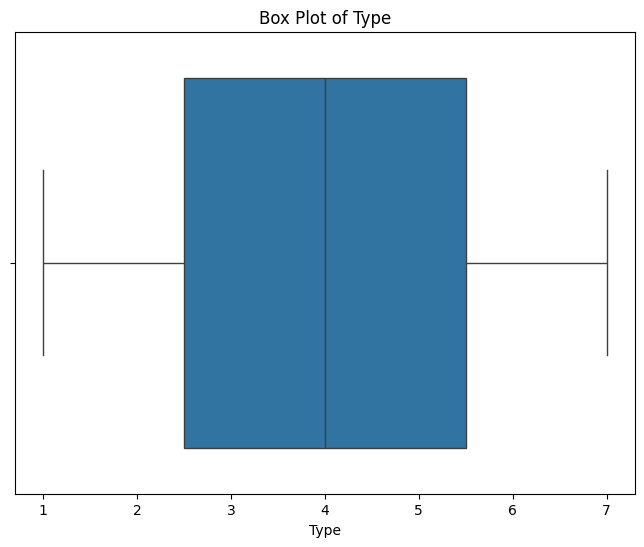

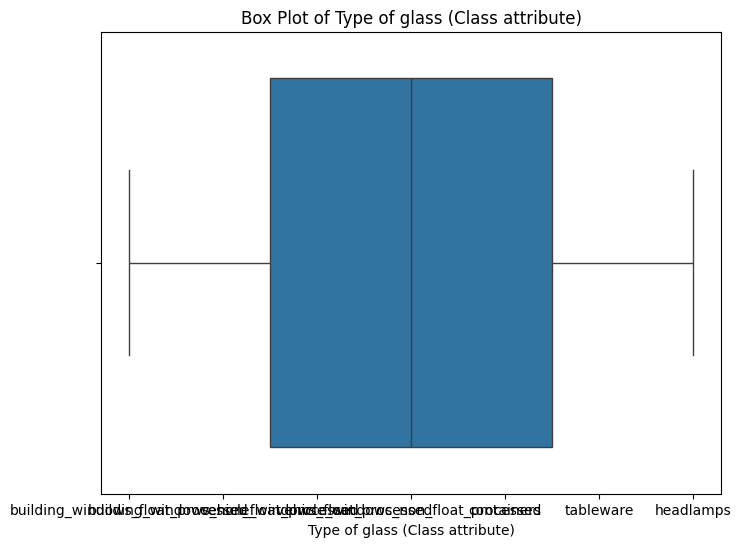

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [57]:
df.describe()

,Type
count,7.000000
mean,4.000000
std,2.160247
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,7.000000


In [58]:
df.isnull().sum()

,0
Type,2
Type of glass (Class attribute),2
Data Description,0


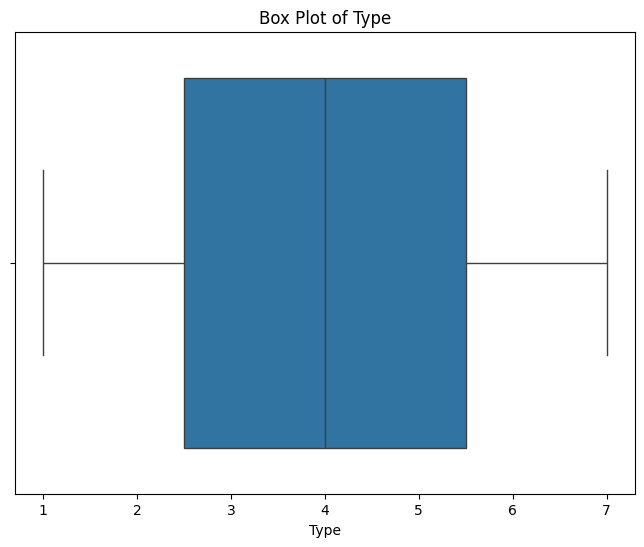

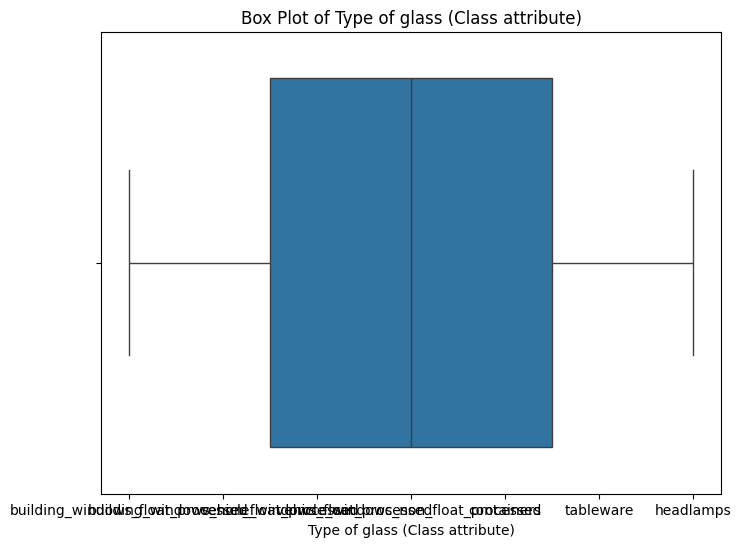

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [60]:
df.describe()

,Type
count,7.000000
mean,4.000000
std,2.160247
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,7.000000


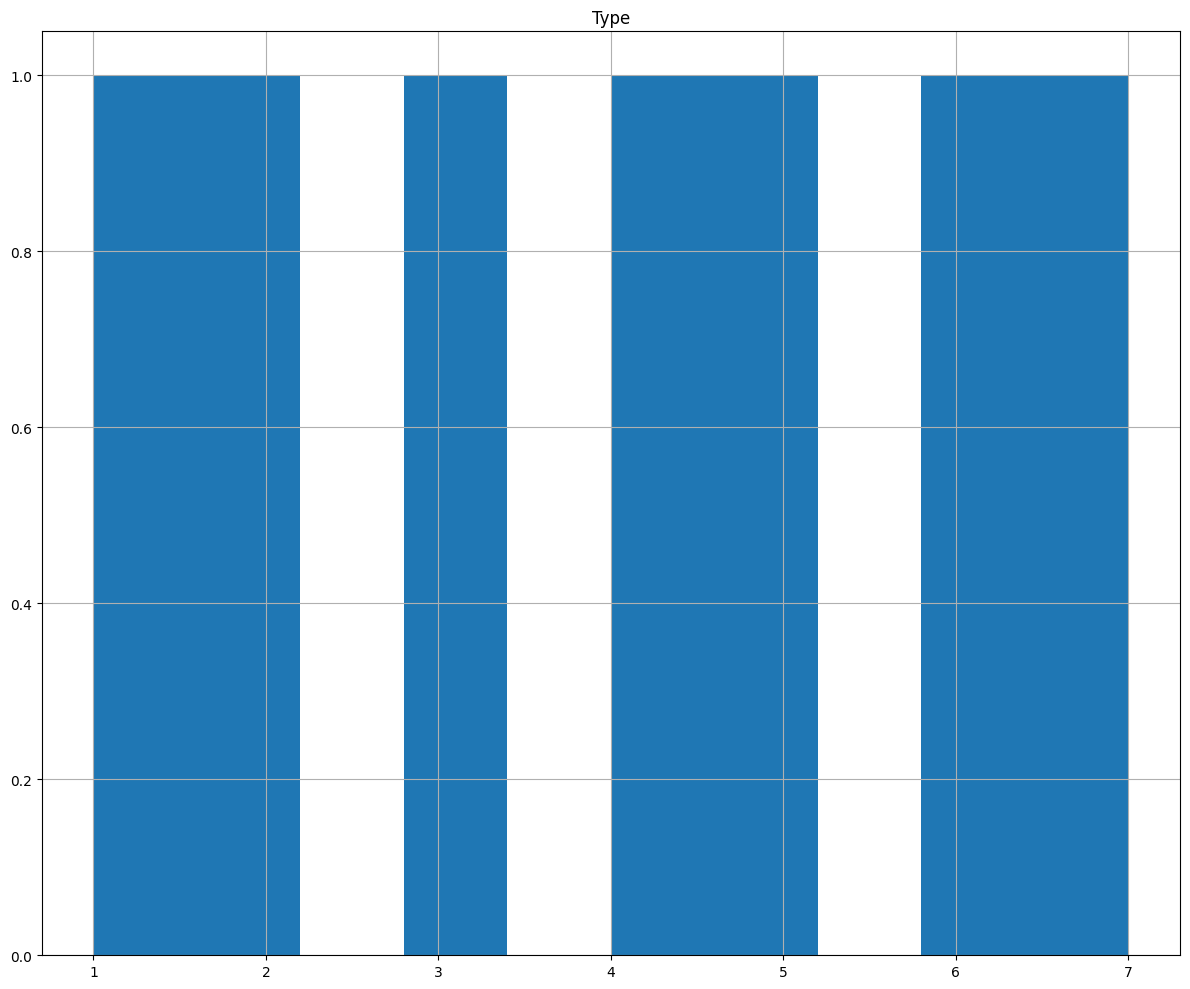

In [61]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df.hist(figsize=(12, 10))  # Adjust figsize as needed
plt.tight_layout()
plt.show()

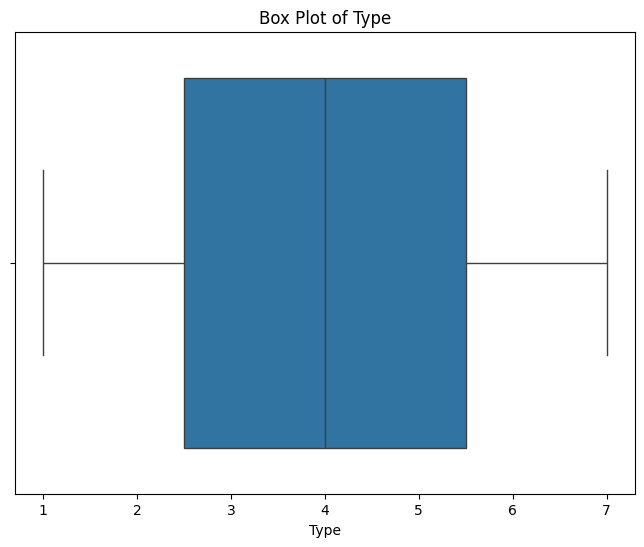

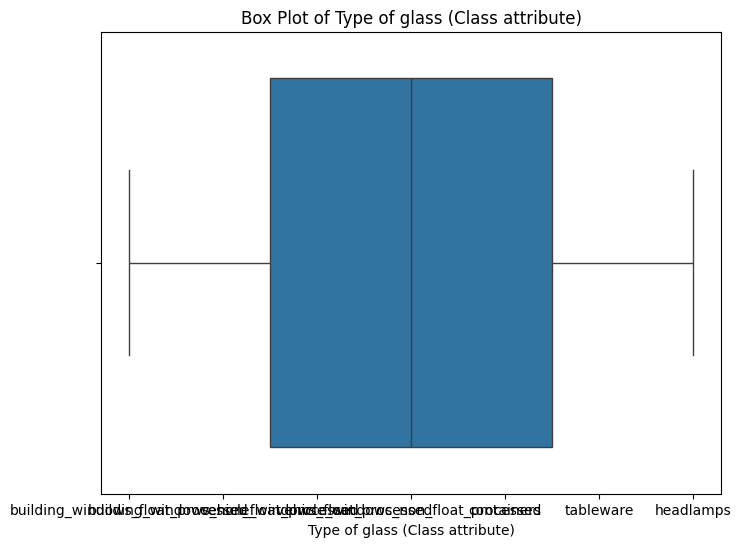

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns[:-1]:  # Exclude the target column if any
    plt.figure(figsize=(8, 6))  # Adjust figsize as needed
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


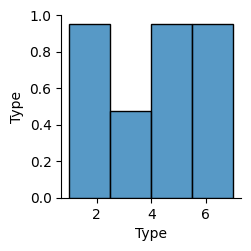

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)  # Assuming 'df' is your DataFrame
plt.show()

In [64]:
df.isnull().sum()

,0
Type,2
Type of glass (Class attribute),2
Data Description,0


In [65]:
df.dropna(inplace=True)  # Removes rows with missing values`

In [66]:
# Impute missing values with the mean of each column
for column in df.columns:
  if df[column].isnull().any():  # Check if column has missing values
    df[column].fillna(df[column].mean(), inplace=True)

In [67]:
# Assuming 'categorical_column' is the name of your categorical column
encoded_df = pd.get_dummies(df, columns=['Type of glass (Class attribute)','Data Description'], prefix=['Type of glass (Class attribute)','Data Description'])

In [68]:
# Perform one-hot encoding on the 'Type' column
encoded_df = pd.get_dummies(df, columns=['Type'], prefix=['Type'])


In [69]:

# Assuming 'df' is your DataFrame and 'categorical_column' is the name of your categorical column
# You can replace 'categorical_column' with the actual column name

# Perform one-hot encoding on the 'categorical_column'
encoded_df = pd.get_dummies(df, columns=['Type of glass (Class attribute)'], prefix=['Type of glass (Class attribute)'])

# Alternatively, you can use Label Encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type of glass (Class attribute)_encoded'] = le.fit_transform(df['Type of glass (Class attribute)'])

# Print the updated DataFrame with encoded features
encoded_df

,Type,Data Description,Type of glass (Class attribute)_building_windows_float_processed,Type of glass (Class attribute)_building_windows_non_float_processed,Type of glass (Class attribute)_containers,Type of glass (Class attribute)_headlamps,Type of glass (Class attribute)_tableware,Type of glass (Class attribute)_vehicle_windows_float_processed,Type of glass (Class attribute)_vehicle_windows_non_float_processed
0,1.0,RI : refractive index,True,False,False,False,False,False,False
1,2.0,Na: Sodium,False,True,False,False,False,False,False
2,3.0,Mg: Magnesium,False,False,False,False,False,True,False
3,4.0,AI: Aluminum,False,False,False,False,False,False,True
4,5.0,Si: Silicon,False,False,True,False,False,False,False
5,6.0,K:Potassium,False,False,False,False,True,False,False
6,7.0,Ca: Calcium,False,False,False,True,False,False,False


In [70]:

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to apply MinMax scaling to all numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the updated DataFrame with scaled features
df

,Type,Type of glass (Class attribute),Data Description,Type of glass (Class attribute)_encoded
0,0.000000,building_windows_float_processed,RI : refractive index,0.000000
1,0.166667,building_windows_non_float_processed,Na: Sodium,0.166667
2,0.333333,vehicle_windows_float_processed,Mg: Magnesium,0.833333
3,0.500000,vehicle_windows_non_float_processed,AI: Aluminum,1.000000
4,0.666667,containers,Si: Silicon,0.333333
5,0.833333,tableware,K:Potassium,0.666667
6,1.000000,headlamps,Ca: Calcium,0.500000


In [71]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # For handling imbalanced data

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target column
# Replace 'target_column' with the actual column name
target_column = 'Type of glass (Class attribute)'
X = df.drop(target_column, axis=1)
y = df[target_column]

# ----> Drop the 'Data Description' column (or any other non-numerical columns) from X
X = X.drop(columns=['Data Description'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standardization to the numerical features
numerical_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can use X_train_resampled and y_train_resampled for training your model

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your data in a DataFrame called 'df'
# and your target variable is in a column called 'Type of glass (Class attribute)'

# 1. Divide the data into train and test split
X = df.drop('Type of glass (Class attribute)', axis=1)
y = df['Type of glass (Class attribute)' ]

# Drop the 'Data Description' column as it's non-numerical
X = X.drop(columns=['Data Description'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Implement a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# 3. Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:

from sklearn.ensemble import BaggingClassifier

# Assuming you have your X_train, y_train, X_test, and y_test defined as before

# Create a BaggingClassifier with a RandomForestClassifier as the base estimator
bagging_classifier = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=10,  # Number of base estimators (you can adjust this)
    random_state=42
)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the BaggingClassifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging Accuracy: {accuracy_bagging:.2f}")
print(f"Bagging Precision: {precision_bagging:.2f}")
print(f"Bagging Recall: {recall_bagging:.2f}")
print(f"Bagging F1-Score: {f1_bagging:.2f}")

Bagging Accuracy: 0.00
Bagging Precision: 0.00
Bagging Recall: 0.00
Bagging F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your X_train, y_train, X_test, and y_test defined as before

# Create an AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # You can adjust the max_depth
    n_estimators=50,  # Number of weak learners (you can adjust this)
    random_state=42
)

# Train the AdaBoostClassifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the AdaBoostClassifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")
print(f"AdaBoost Precision: {precision_adaboost:.2f}")
print(f"AdaBoost Recall: {recall_adaboost:.2f}")
print(f"AdaBoost F1-Score: {f1_adaboost:.2f}")

AdaBoost Accuracy: 0.00
AdaBoost Precision: 0.00
AdaBoost Recall: 0.00
AdaBoost F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               Accuracy  Precision  Recall  F1-Score
Random Forest       0.0        0.0     0.0       0.0
Bagging             0.0        0.0     0.0       0.0
AdaBoost            0.0        0.0     0.0       0.0


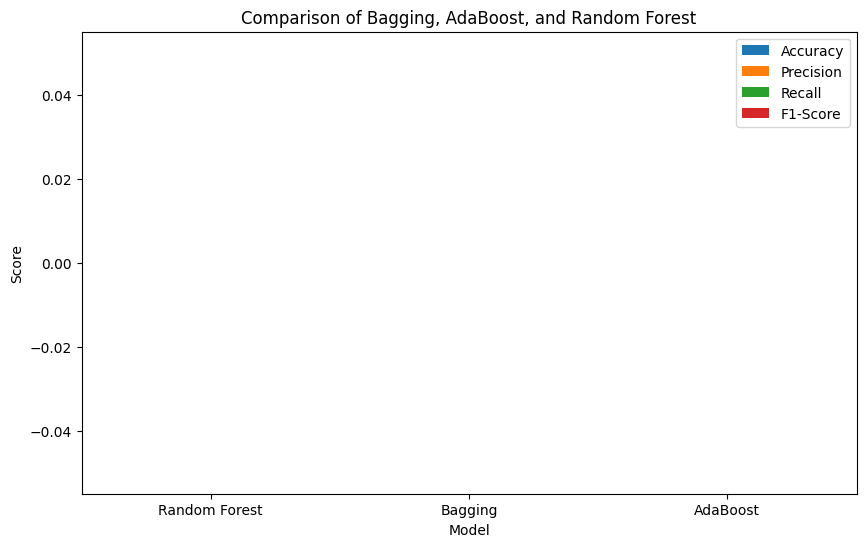

In [75]:

results = {}

# ... (Your existing code for Random Forest, Bagging, and AdaBoost) ...

# Store the results in the dictionary
results['Random Forest'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

results['Bagging'] = {
    'Accuracy': accuracy_bagging,
    'Precision': precision_bagging,
    'Recall': recall_bagging,
    'F1-Score': f1_bagging
}

results['AdaBoost'] = {
    'Accuracy': accuracy_adaboost,
    'Precision': precision_adaboost,
    'Recall': recall_adaboost,
    'F1-Score': f1_adaboost
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Transpose the DataFrame for better readability
results_df = results_df.transpose()

# Print the results DataFrame
print(results_df)

# You can also visualize the results using a bar plot
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Bagging, AdaBoost, and Random Forest')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

Explain Bagging and Boosting methods. How is it different from each other.

Bagging

Creates multiple models on subsets of data and combines their predictions. Reduces variance and overfitting. Example: Random Forest.

Boosting

Trains models sequentially, each focusing on previous errors. Improves accuracy by correcting mistakes. Example: AdaBoost. Key Differences

Bagging: Parallel, reduces variance, uses strong learners. Boosting: Sequential, reduces bias, uses weak learners.

Explain how to handle imbalance in the data.

Resampling:
Oversampling: Increase minority class instances (e.g., using SMOTE). Undersampling: Decrease majority class instances.

Cost-Sensitive Learning:
Penalize misclassifying minority class more heavily.

Ensemble Methods:
Use Bagging or Boosting with cost-sensitive base learners.

Evaluation Metrics:
Use precision, recall, F1-score, AUC instead of just accuracy.

